In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import pickle
from glob import glob
from read_roi import read_roi_zip

In [2]:
def load_obj(path, name):
    with open(path + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def read_spike_complexity(names, path_rois, path_spikes):
    epochs = ['_baseline', '_early', '_pre']
    all_spikes = {}
    for e in names:
        for f in epochs:
            n = read_roi(path_rois, e + f )
            spike = open(path_spikes + e + f + "_spikes_complexity.csv", "r")
            reader_spike = csv.reader(spike)
            spikes = np.zeros((n,8000))
            for i,line in enumerate(reader_spike):
                for j in range(len(line)):
                    spikes[i][j] = line[j]
            all_spikes[e+f] = spikes
            
    return(all_spikes)

def read_roi(path, subject_roi):
    
    roi = read_roi_zip(glob(path + subject_roi +'.zip')[0])
    n = len(roi)
    
    for i, R in enumerate(roi):
        x = roi[R]['x']
        y = roi[R]['y']
    return(n)

def bin_time_series(array, binsize, total_frame):
    
    binned_spikes = []
    
    for i in range(len(array)):
        A = array[i].reshape(binsize, int(total_frame/binsize))
        binned_spikes.append(A)
        
    return(np.array(binned_spikes, dtype=np.int32))

def raster_plot(spikes, ax, s = 500, epochs = True): #plots the raster plot of the spike activity on a given axis 

        #be careful that neurons in different epochs are ordered differently
        n,t = spikes.shape
        
        #cmap = plt.cm.Spectral
        #norm = plt.Normalize(vmin = 0, vmax = float(np.max(spikes)))
        
        for i in range(n):
            for j in range(t):
                if spikes[i][j] == 0: pass
                else:
                    ax.scatter(j, i, s = 5, c = 'b', marker = 'x')#, norm = norm, cmap = cmap)
                    ax.set_title('Spike Raster Plot', fontsize = 20)
                    ax.set_xlabel('Time (Frames)', fontsize = 15)
                    ax.set_ylabel('Neuron ID', fontsize = 15)
                    ax.set_xticks([s*i for i in range(int(t/s)+1)])
                    ax.set_yticks([5*i for i in range(int(n/5)+1)]+[n])
                    ax.tick_params(axis = 'x', labelsize = 10)
                    ax.tick_params(axis = 'y', labelsize = 13)
        if epochs:pass
        else:ax.vlines([0,8000,16000],0,n+1, color = 'r')
                        
def concatenate(spikes, names): # concatanes the spike complexities of three epochs (baseline, early, pre) 
    #into single matrix. Some subjects have different number of ROIS in different epochs, so we just add zero rows
    ## to cover up that difference. 
    epochs = ['_baseline', '_early', '_pre']
    all_concatenated = {}
    for e in names:
        size = 0
        for i,f in enumerate(epochs):
            if spikes[e+f].shape[0] > size:
                size = spikes[e+f].shape[0]
        concatenated = np.zeros((size, 3*spikes[e+f].shape[1]))
        for i,f in enumerate(epochs):
            concatenated[0:spikes[e+f].shape[0],i*spikes[e+f].shape[1]:(i+1)*spikes[e+f].shape[1]] = spikes[e+f]
        all_concatenated[e] = concatenated
    return(all_concatenated)
    

def find_bin_size(array, spike_per_layer):
    
    array = bin_time_series(array, 500, array.shape[1])
    n, t, l = array.shape
    fouls = []
    
    for i in range(n):
        for j in range(l):
            if len(np.nonzero(array[i,:,j])[0]) < spike_per_layer:
                fouls.append('neuron %d in layer %d doesnt have enough spikes'%(i,j))
                
    return(fouls)

In [3]:
path_spikes = "/Users/bengieru/MLN/data/Johan_Clean_Traces_Features_and_Spikes/"
path_rois = "/Users/bengieru/MLN/data/sarah_ROI/"
path_subjects = "/Users/bengieru/MLN/subjects/"
epochs = ['_baseline', '_early', '_pre']

In [4]:
subjects = load_obj(path_subjects, 'subjects')

subject_names = subjects['het'] + subjects['wt']

all_spikes = read_spike_complexity(subject_names, path_rois, path_spikes)

all_concatenated = concatenate(all_spikes, subject_names)

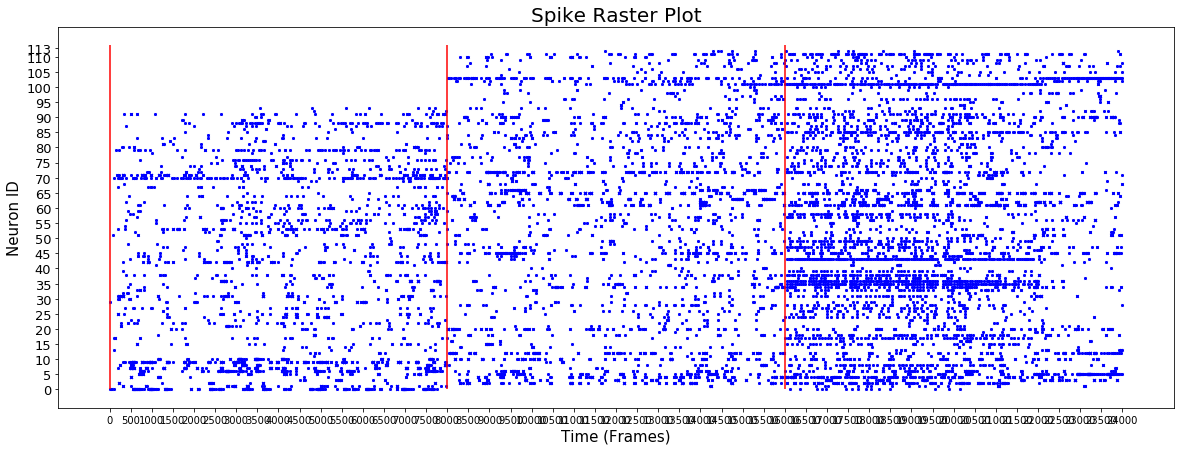

In [5]:
fig,ax = plt.subplots(1, 1, figsize = (20,7))
#for i,e in enumerate(subject_names):
raster_plot(all_concatenated[subject_names[0]], epochs = False, ax = ax)
#raster_plot(all_concatenated[subject_names[1]], ax = ax[1])
#raster_plot(all_concatenated[subject_names[2]], ax = ax[2])
#raster_plot(all_spikes[subject_names[0]+'_baseline'], ax = ax[2])
#raster_plot(all_spikes[subject_names[0]+'_early'], ax = ax[3])
#raster_plot(all_spikes[subject_names[0]+'_pre'], ax = ax[4])

In [6]:
k = []
for e in subject_names:
    k.append(find_bin_size(all_concatenated[e],5))
    for f in epochs:
        print(all_spikes[e+f].shape)

(94, 8000)
(113, 8000)
(113, 8000)
(120, 8000)
(120, 8000)
(120, 8000)
(96, 8000)
(96, 8000)
(96, 8000)
(114, 8000)
(114, 8000)
(114, 8000)
(128, 8000)
(128, 8000)
(128, 8000)
(260, 8000)
(228, 8000)
(228, 8000)
(174, 8000)
(174, 8000)
(174, 8000)
(134, 8000)
(138, 8000)
(156, 8000)
(57, 8000)
(57, 8000)
(57, 8000)
(178, 8000)
(178, 8000)
(178, 8000)
(116, 8000)
(126, 8000)
(134, 8000)
(138, 8000)
(138, 8000)
(138, 8000)
(68, 8000)
(87, 8000)
(87, 8000)
(162, 8000)
(162, 8000)
(162, 8000)
(84, 8000)
(84, 8000)
(77, 8000)
(112, 8000)
(112, 8000)
(112, 8000)
(94, 8000)
(100, 8000)
(100, 8000)
(87, 8000)
(87, 8000)
(87, 8000)
(101, 8000)
(101, 8000)
(175, 8000)
(109, 8000)
(109, 8000)
(109, 8000)


['neuron 0 in layer 0 doesnt have enough spikes',
 'neuron 0 in layer 1 doesnt have enough spikes',
 'neuron 0 in layer 2 doesnt have enough spikes',
 'neuron 0 in layer 3 doesnt have enough spikes',
 'neuron 0 in layer 4 doesnt have enough spikes',
 'neuron 0 in layer 5 doesnt have enough spikes',
 'neuron 0 in layer 6 doesnt have enough spikes',
 'neuron 0 in layer 7 doesnt have enough spikes',
 'neuron 0 in layer 8 doesnt have enough spikes',
 'neuron 0 in layer 9 doesnt have enough spikes',
 'neuron 0 in layer 10 doesnt have enough spikes',
 'neuron 0 in layer 11 doesnt have enough spikes',
 'neuron 0 in layer 12 doesnt have enough spikes',
 'neuron 0 in layer 13 doesnt have enough spikes',
 'neuron 0 in layer 14 doesnt have enough spikes',
 'neuron 0 in layer 15 doesnt have enough spikes',
 'neuron 0 in layer 16 doesnt have enough spikes',
 'neuron 0 in layer 17 doesnt have enough spikes',
 'neuron 0 in layer 18 doesnt have enough spikes',
 'neuron 0 in layer 19 doesnt have enough